In [54]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
HF = pd.read_csv('Data/Heuristic Function.csv', index_col = 0)
AE = pd.read_csv('Data/Auto Encoder.csv', index_col = 0)

In [15]:
HF.head()

,Euclidean_Distance,BBLE
0,1.537640,1000010101
1,24.818232,1000010201
2,0.162913,1000020001
3,0.166143,1000020023
4,24.311942,1000030001


In [16]:
HF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070994 entries, 0 to 1070993
Data columns (total 2 columns):
Euclidean_Distance    1070994 non-null float64
BBLE                  1070994 non-null object
dtypes: float64(1), object(1)
memory usage: 24.5+ MB


In [17]:
AE.head()

,Euclidean_Distance,BBLE
0,0.685626,1000010101
1,22.858678,1000010201
2,0.070510,1000020001
3,0.061508,1000020023
4,21.891265,1000030001


In [18]:
AE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070994 entries, 0 to 1070993
Data columns (total 2 columns):
Euclidean_Distance    1070994 non-null float64
BBLE                  1070994 non-null object
dtypes: float64(1), object(1)
memory usage: 24.5+ MB


In [23]:
AS = pd.merge(left = HF, right = AE, on = ['BBLE'], suffixes=('_HF', '_AE'))

In [24]:
AS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070994 entries, 0 to 1070993
Data columns (total 3 columns):
Euclidean_Distance_HF    1070994 non-null float64
BBLE                     1070994 non-null object
Euclidean_Distance_AE    1070994 non-null float64
dtypes: float64(2), object(1)
memory usage: 32.7+ MB


In [31]:
AS['SUM'] = AS['Euclidean_Distance_HF'] + AS['Euclidean_Distance_AE']

In [55]:
AS = AS[['BBLE', 'Euclidean_Distance_HF', 'Euclidean_Distance_AE', 'SUM']]

In [56]:
AS.head()

,BBLE,Euclidean_Distance_HF,Euclidean_Distance_AE,SUM
0,1000010101,1.537640,0.685626,2.223267
1,1000010201,24.818232,22.858678,47.676909
2,1000020001,0.162913,0.070510,0.233423
3,1000020023,0.166143,0.061508,0.227652
4,1000030001,24.311942,21.891265,46.203207


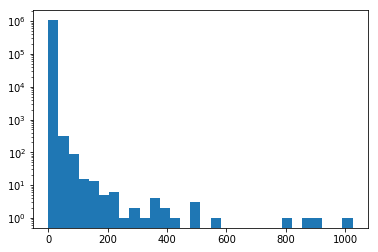

In [57]:
plt.hist(AS['Euclidean_Distance_HF'], bins = 30, log = True);

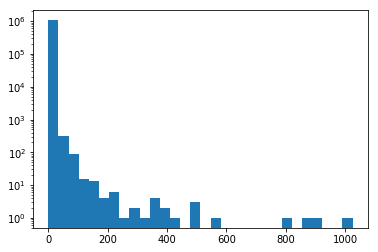

In [58]:
plt.hist(AS['Euclidean_Distance_AE'], bins = 30, log = True);

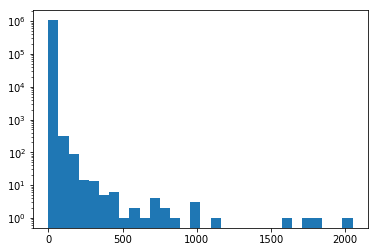

In [59]:
plt.hist(AS['SUM'], bins = 30, log = True);

In [61]:
AS.sort_values('Euclidean_Distance_HF', ascending = False).head(10)

,BBLE,Euclidean_Distance_HF,Euclidean_Distance_AE,SUM
632815,4018420001,1024.720577,1024.940893,2049.661470
776305,4080100001,912.718473,911.180198,1823.898671
565391,3085900700,885.116850,884.742928,1769.859778
1067359,5078530085,805.184492,803.204341,1608.388833
585117,4004200001,559.454341,557.886204,1117.340546
585438,4004590005,501.268249,499.246620,1000.514869
565397,3085910100,493.842597,492.763180,986.605777
85885,1012540010,483.650241,481.265813,964.916053
917941,4142600001,422.921011,422.139731,845.060742
750815,4066610005E,407.191244,405.463862,812.655106


In [62]:
AS.sort_values('Euclidean_Distance_AE', ascending = False).head(10)

,BBLE,Euclidean_Distance_HF,Euclidean_Distance_AE,SUM
632815,4018420001,1024.720577,1024.940893,2049.661470
776305,4080100001,912.718473,911.180198,1823.898671
565391,3085900700,885.116850,884.742928,1769.859778
1067359,5078530085,805.184492,803.204341,1608.388833
585117,4004200001,559.454341,557.886204,1117.340546
585438,4004590005,501.268249,499.246620,1000.514869
565397,3085910100,493.842597,492.763180,986.605777
85885,1012540010,483.650241,481.265813,964.916053
917941,4142600001,422.921011,422.139731,845.060742
750815,4066610005E,407.191244,405.463862,812.655106


In [63]:
AS.sort_values('SUM', ascending = False).head(10)

,BBLE,Euclidean_Distance_HF,Euclidean_Distance_AE,SUM
632815,4018420001,1024.720577,1024.940893,2049.661470
776305,4080100001,912.718473,911.180198,1823.898671
565391,3085900700,885.116850,884.742928,1769.859778
1067359,5078530085,805.184492,803.204341,1608.388833
585117,4004200001,559.454341,557.886204,1117.340546
585438,4004590005,501.268249,499.246620,1000.514869
565397,3085910100,493.842597,492.763180,986.605777
85885,1012540010,483.650241,481.265813,964.916053
917941,4142600001,422.921011,422.139731,845.060742
750815,4066610005E,407.191244,405.463862,812.655106


In [64]:
AS.to_csv('Data/AS.csv')